In [197]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
df = pd.read_csv("HWdata.csv")

In [59]:
df.head()

,SW,MOI,YOI,DOI_CMC,RMOB,RYOB,RDOB_CMC,RCA,Region,TPR,...,DOFB_CMC,AOR,MTFBI,DSOUOM_CMC,RW,RH,RBMI,ID,CEB1,CEB2
0,504153,8,2011,1340,3,1974,891,37,1,2,...,1112.0,18.0,43.0,NaN,402,1525,1729,132,4,3
1,504153,8,2011,1340,3,1992,1107,19,1,2,...,1339.0,19.0,43.0,NaN,354,1459,1663,133,2,12
2,504153,8,2011,1340,2,1986,1034,25,1,2,...,1248.0,17.0,21.0,1339.0,483,1605,1875,174,5,4
3,504153,8,2011,1340,9,1980,969,30,1,2,...,1160.0,15.0,34.0,1319.0,401,1473,1848,1132,6,4
4,504153,8,2011,1340,6,1986,1038,25,1,2,...,1232.0,16.0,33.0,1332.0,501,1485,2272,1162,1,6


In [61]:
# Count missing values in each column
missing_values_count = df.isnull().sum()
missing_values_count

SW               0
MOI              0
YOI              0
DOI_CMC          0
RMOB             0
RYOB             0
RDOB_CMC         0
RCA              0
Region           0
TPR              0
DPR              0
NV               0
HEL              0
Has_Radio        0
Has_TV           0
Religion         0
WI               0
MOFB          5507
YOB           5507
DOB_CMC       1817
DOFB_CMC      1817
AOR           1817
MTFBI         1817
DSOUOM_CMC    7563
RW               0
RH               0
RBMI             0
ID               0
CEB1             0
CEB2             0
dtype: int64

In [63]:
# Drop rows with missing values in critical columns
df = df.dropna()

In [65]:
# Remove duplicate rows
df = df.drop_duplicates()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7836 entries, 2 to 17840
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SW          7836 non-null   int64  
 1   MOI         7836 non-null   int64  
 2   YOI         7836 non-null   int64  
 3   DOI_CMC     7836 non-null   int64  
 4   RMOB        7836 non-null   int64  
 5   RYOB        7836 non-null   int64  
 6   RDOB_CMC    7836 non-null   int64  
 7   RCA         7836 non-null   int64  
 8   Region      7836 non-null   int64  
 9   TPR         7836 non-null   int64  
 10  DPR         7836 non-null   int64  
 11  NV          7836 non-null   int64  
 12  HEL         7836 non-null   int64  
 13  Has_Radio   7836 non-null   int64  
 14  Has_TV      7836 non-null   int64  
 15  Religion    7836 non-null   int64  
 16  WI          7836 non-null   int64  
 17  MOFB        7836 non-null   float64
 18  YOB         7836 non-null   float64
 19  DOB_CMC     7836 non-null   flo

In [69]:
# confirming if the missing values have been dropped
missing_values_count = df.isnull().sum()
missing_values_count

SW            0
MOI           0
YOI           0
DOI_CMC       0
RMOB          0
RYOB          0
RDOB_CMC      0
RCA           0
Region        0
TPR           0
DPR           0
NV            0
HEL           0
Has_Radio     0
Has_TV        0
Religion      0
WI            0
MOFB          0
YOB           0
DOB_CMC       0
DOFB_CMC      0
AOR           0
MTFBI         0
DSOUOM_CMC    0
RW            0
RH            0
RBMI          0
ID            0
CEB1          0
CEB2          0
dtype: int64

In [71]:
df.describe()

,SW,MOI,YOI,DOI_CMC,RMOB,RYOB,RDOB_CMC,RCA,Region,TPR,...,DOFB_CMC,AOR,MTFBI,DSOUOM_CMC,RW,RH,RBMI,ID,CEB1,CEB2
count,7.836000e+03,7836.000000,7836.0,7836.000000,7836.000000,7836.000000,7836.000000,7836.000000,7836.000000,7836.000000,...,7836.000000,7836.000000,7836.000000,7836.000000,7836.000000,7836.000000,7836.000000,7.836000e+03,7836.000000,7836.000000
mean,1.000503e+06,9.528841,2011.0,1341.528841,6.425217,1977.655436,938.290454,33.140123,3.955334,1.659265,...,1153.656330,17.488642,34.136804,1284.257147,684.035605,1681.545814,2347.484686,7.551858e+05,3.343415,5.026161
std,5.288243e+05,1.674787,0.0,1.674787,3.480480,7.374093,88.458880,7.359405,1.864811,0.473987,...,86.469691,3.037985,85.750431,60.043159,1317.735424,1197.654035,1189.528424,1.701238e+06,2.346687,2.248211
min,1.843160e+05,7.000000,2011.0,1339.000000,1.000000,1961.000000,740.000000,15.000000,1.000000,1.000000,...,896.000000,12.000000,0.000000,933.000000,265.000000,1044.000000,1245.000000,1.740000e+02,0.000000,0.000000
25%,5.842730e+05,8.000000,2011.0,1340.000000,3.000000,1972.000000,868.000000,27.000000,2.000000,1.000000,...,1091.000000,15.000000,11.000000,1259.000000,428.000000,1475.000000,1898.000000,1.403020e+05,2.000000,3.000000
50%,9.706400e+05,10.000000,2011.0,1342.000000,6.000000,1978.000000,945.000000,33.000000,4.000000,2.000000,...,1163.000000,17.000000,22.000000,1304.000000,487.000000,1510.000000,2140.500000,3.374270e+05,3.000000,5.000000
75%,1.288839e+06,11.000000,2011.0,1343.000000,10.000000,1984.000000,1009.000000,39.000000,6.000000,2.000000,...,1222.000000,19.000000,36.000000,1330.000000,560.000000,1547.250000,2437.000000,5.176320e+05,5.000000,6.000000
max,3.381150e+06,12.000000,2011.0,1344.000000,12.000000,1996.000000,1161.000000,49.000000,7.000000,2.000000,...,1334.000000,34.000000,996.000000,1344.000000,9999.000000,9999.000000,9999.000000,5.791051e+07,17.000000,15.000000


In [73]:
# Creating a column called "BMI" 
df['BMI'] = df['RW'] / (df['RH'] / 100) ** 2

In [75]:
df.columns

Index(['SW', 'MOI', 'YOI', 'DOI_CMC', 'RMOB', 'RYOB', 'RDOB_CMC', 'RCA',
       'Region', 'TPR', 'DPR', 'NV', 'HEL', 'Has_Radio', 'Has_TV', 'Religion',
       'WI', 'MOFB', 'YOB', 'DOB_CMC', 'DOFB_CMC', 'AOR', 'MTFBI',
       'DSOUOM_CMC', 'RW', 'RH', 'RBMI', 'ID', 'CEB1', 'CEB2', 'BMI'],
      dtype='object')

In [77]:
# Question 1: Linear Regression

In [ ]:
# Use HWdata data to fit a simple linear regression model by selecting a dependent and an independent variable. You can use one of the variables such as RH, RW, RMFBI, RBMI as dependent variable. 
# You have freedom to choose independent variable. 

In [225]:
# Using BMI as independent variable and RBMI as my depend variable

X = df['BMI']
y = df['RBMI']
    
# Adding a constant to the model
X = sm.add_constant(X)
    
# Fitting the regression model
model = sm.OLS(y, X).fit()
    
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   RBMI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     30.64
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           3.21e-08
Time:                        12:20:57   Log-Likelihood:                -66592.
No. Observations:                7836   AIC:                         1.332e+05
Df Residuals:                    7834   BIC:                         1.332e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2142.8240     39.332     54.480      0.0

In [ ]:
# Give the rationale for the selection of the independent and dependent variable.  

'''
Independent Variable (BMI - Body Mass Index): BMI is chosen as the independent variable because it is a measure of body composition and is often used as an indicator of overall health. 
    BMI can reflect various physical and lifestyle factors that may influence major life events, such as marriage and family planning.
    It is reasonable to hypothesize that health metrics like BMI could have an impact on the timing of marriage or the birth-to-marriage interval.

Dependent Variable (RBMI - Respondent Birth to Marriage Interval): The birth-to-marriage interval (RBMI) is selected as the dependent variable 
    because it can reflect how health and physical status (represented by BMI) might influence the timing between life events such as birth and marriage. 
    Understanding whether BMI has an effect on RBMI can help reveal if health factors are linked to socio-cultural decisions about family life.
'''

In [ ]:
# Report whether intercept and slope coefficients are significant or not. 
'''
From the regression results result:

Intercept (const):
        Coefficient: 2142.8240
        p-value: 0.000
The intercept is statistically significant since the p-value is less than 0.05. We reject the null hypothesis. This means the intercept is statistically significant, indicating that there is a significant constant effect on the dependent variable (RBMI)


Slope Coefficient (BMI):
        Coefficient: 94.3045
        p-value: 0.000
The coefficient for BMI is also statistically significant, as its p-value is less than 0.05. Therefore, we reject the null hypothesis for the slope coefficient as well. This indicates that there is a significant linear relationship between BMI and RBMI.

In conclusion, both the intercept and the slope coefficients are significant, meaning that BMI has a statistically significant relationship with RBMI. 
'''

In [ ]:
# Report the estimates of the regression coefficients (intercept and slope). 
'''
From the regression summary: 

    Intercept (const): The estimate of the intercept is 2142.8240.
    Slope (BMI): The estimate of the slope for BMI is 94.3045.
    
These estimates represent the linear relationship between BMI and RBMI:
    The intercept (2142.8240) indicates the estimated value of RBMI when BMI is zero.
    The slope (94.3045) means that for every one unit increase in BMI, the RBMI is expected to increase by approximately 94.30 units, assuming all other factors remain constant.
'''

In [227]:
# Report the confidence interval of the estimate of regression coefficients 
model.conf_int()

,0,1
const,2065.722733,2219.925365
BMI,60.906805,127.702099


In [ ]:
# Report the confidence interval of the estimate of regression coefficients 

# Intercept (const): The confidence interval for the intercept is [2065.723, 2219.925].
# Slope (BMI): The confidence interval for the slope of BMI is [60.907, 127.702].

In [229]:
# What percentage of the dependent variable is explained by the independent variable? 
print(f"Percentage of variance explained by BMI: {model.rsquared * 100:.2f}%")

Percentage of variance explained by BMI: 0.39%


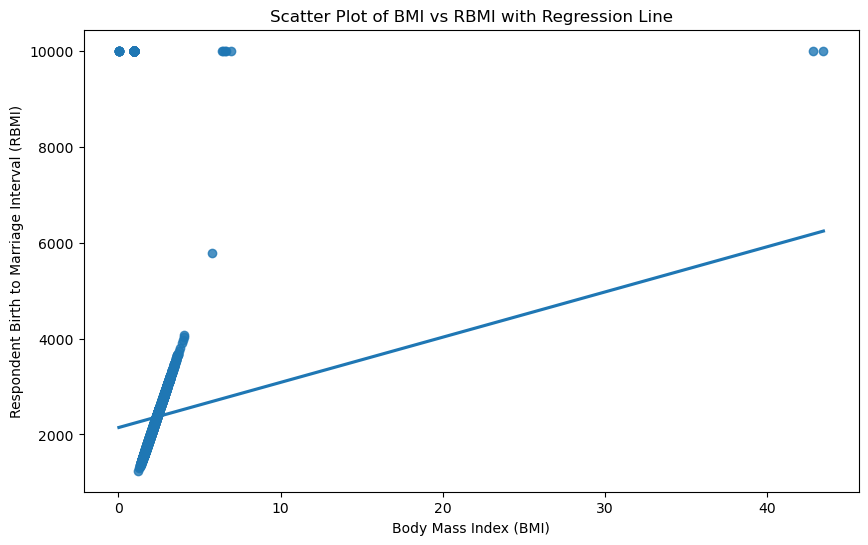

In [231]:
# Show a scatter plot together with the fitted regression line.

plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='RBMI', data=df, ci=None)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Respondent Birth to Marriage Interval (RBMI)')
plt.title('Scatter Plot of BMI vs RBMI with Regression Line')
plt.show()

In [233]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(model)

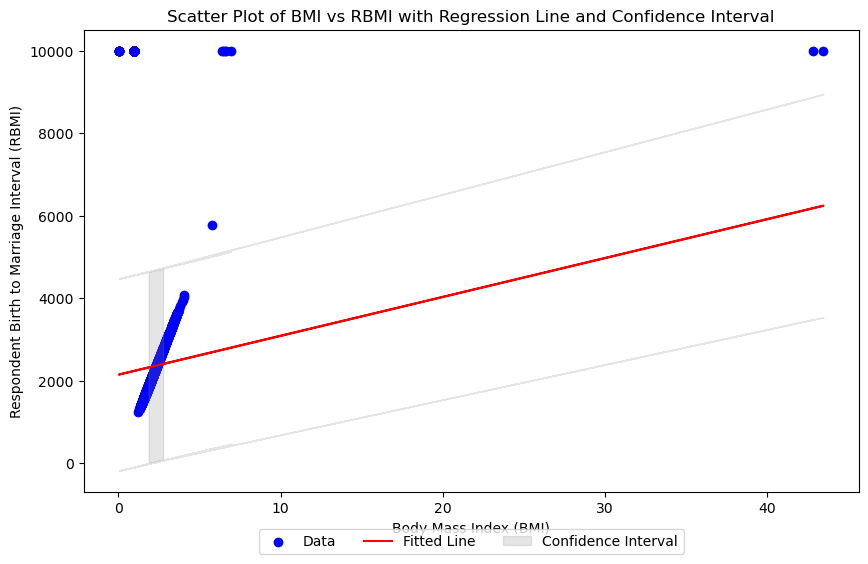

In [235]:
# Produce a confidence interval for your fitted regression line. 

plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['RBMI'], label='Data', color='blue')
plt.plot(df['BMI'], model.predict(X), label='Fitted Line', color='red')
plt.fill_between(df['BMI'], iv_l, iv_u, color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Respondent Birth to Marriage Interval (RBMI)')
plt.title('Scatter Plot of BMI vs RBMI with Regression Line and Confidence Interval')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

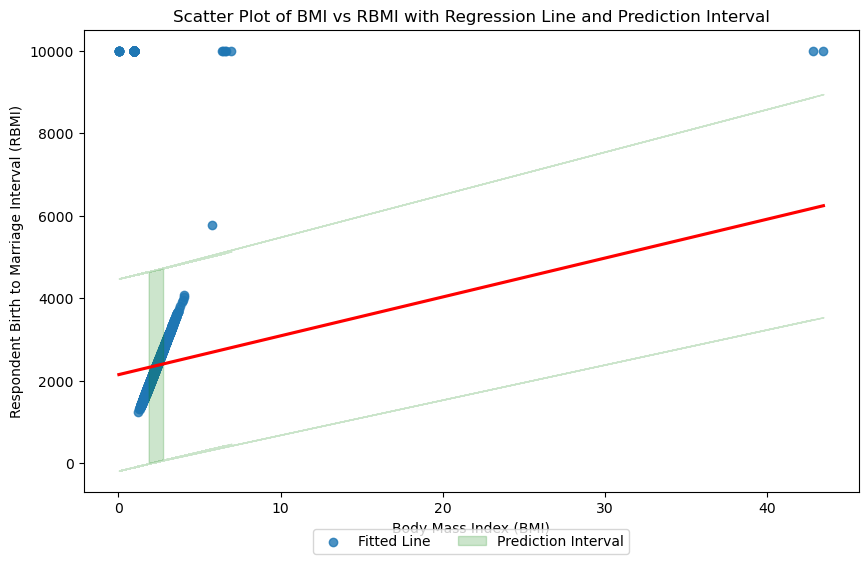

In [237]:
# Produce a prediction interval for your fitted regression line. 

# Produce prediction interval for the fitted regression line
prediction = model.get_prediction(X)
prediction_summary = prediction.summary_frame(alpha=0.05)
pred_mean = prediction_summary['mean']
pred_ci_lower = prediction_summary['obs_ci_lower']
pred_ci_upper = prediction_summary['obs_ci_upper']
    
# Scatter plot with regression line and prediction interval
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='RBMI', data=df, ci=None, line_kws={'color': 'red'}, label='Fitted Line')
plt.fill_between(X['BMI'], pred_ci_lower, pred_ci_upper, color='green', alpha=0.2, label='Prediction Interval')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Respondent Birth to Marriage Interval (RBMI)')
plt.title('Scatter Plot of BMI vs RBMI with Regression Line and Prediction Interval')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [ ]:
# How can you explain changes in dependent variable in terms of changes in independent variable? 
'''
The regression equation from the output can be written as:

RBMI = 2142.8240 + 94.3045 × BMI

This means:
        For every one-unit increase in BMI, RBMI increases by 94.3045 units.
        When BMI is zero, RBMI is expected to be 2142.8240 units.

'''

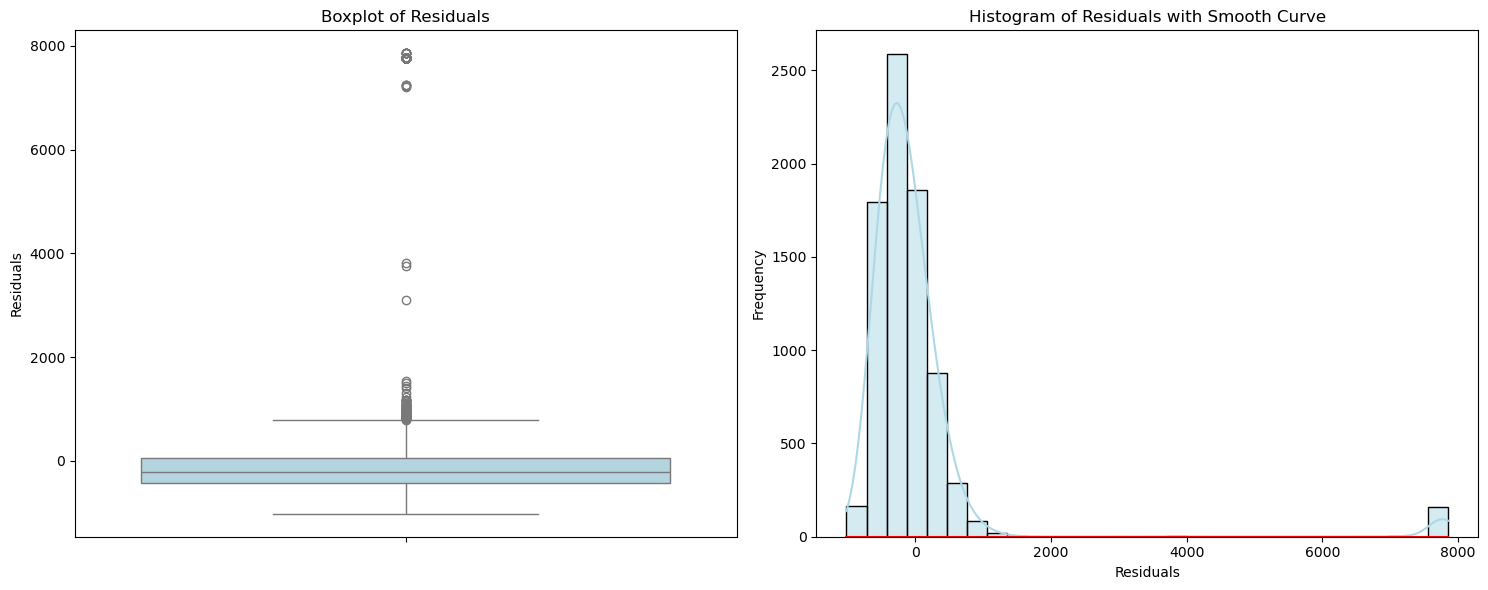

In [239]:
# Calculate residuals
residuals = y - model.predict(X)
    
# Plot Boxplot and Histogram of the Residuals side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
# Boxplot of Residuals
sns.boxplot(y=residuals, ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Residuals')
axes[0].set_ylabel('Residuals')
    
# Histogram of Residuals with Smooth Curve
sns.histplot(residuals, kde=True, ax=axes[1], color='lightblue', bins=30)
kde = gaussian_kde(residuals)
x_vals = np.linspace(min(residuals), max(residuals), 100)
axes[1].plot(x_vals, kde(x_vals), color='red')
axes[1].set_title('Histogram of Residuals with Smooth Curve')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [ ]:
# Does histogram look like symmetric? 

# The histogram of residuals shown in the plot does not look symmetric. It has a strong right skew, indicated by the longer tail to the right side. 

In [135]:
# Perform Shapiro-Wilk test for normality of residuals

shapiro_test_stat, p_value = shapiro(residuals)

# Print results
print(f"Shapiro-Wilk test statistic: {shapiro_test_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro-Wilk test statistic: 0.3632
p-value: 0.0000


C:\Users\adebo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7836.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# If Shapiro-Wilk test p value is less than 0.05, which means non-normality, can you suggest any method to make residual normal? Just write one or two sentences. Hint Transformation 

'''
To address this non-normality, one could try applying a transformation to the dependent variable (RBMI). Common transformations include:
    Logarithmic Transformation: Applying a logarithmic transformation to RBMI will reduce skewness since the data has a long right tail.
    Square Root Transformation: This can help reduce the impact of outliers and make the distribution more symmetric.
    Box-Cox Transformation: A more flexible transformation that can adapt to various forms of skewness.
'''

In [ ]:
# PART 2: Multiple Regression 

In [137]:
# Select dependent and independent variables
# Focusing on health
dependent_var = 'BMI'
independent_vars = ['RH', 'RW', 'AOR', 'WI', 'HEL']

In [139]:
# Define dependent (y) and independent variables (X)
X = df[independent_vars]
y = df[dependent_var]

In [143]:
X,y

(         RH   RW   AOR  WI  HEL
 2      1605  483  17.0   3    2
 3      1473  401  15.0   4    1
 4      1485  501  16.0   2    2
 5      1577  427  15.0   2    1
 7      1496  459  15.0   1    2
 ...     ...  ...   ...  ..  ...
 17834  1533  411  13.0   1    0
 17835  1424  360  16.0   1    1
 17836  1463  388  13.0   1    1
 17837  1451  397  18.0   2    2
 17840  1564  676  15.0   4    1
 
 [7836 rows x 5 columns],
 2        1.874982
 3        1.848157
 4        2.271877
 5        1.716977
 7        2.050924
            ...   
 17834    1.748870
 17835    1.775344
 17836    1.812772
 17837    1.885627
 17840    2.763587
 Name: BMI, Length: 7836, dtype: float64)

In [145]:
# Add a constant to the model
X = sm.add_constant(X)

In [147]:
# Fit the multiple regression model
model = sm.OLS(y, X).fit()
    
# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     880.1
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:49:40   Log-Likelihood:                -7496.9
No. Observations:                7836   AIC:                         1.501e+04
Df Residuals:                    7830   BIC:                         1.505e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3555      0.050     66.549      0.0

In [ ]:
# Provide rationale for selecting these variables.  
'''
# Rationale for Selecting These Variables
# RH (Height) and RW (Weight): Core components of BMI calculation, directly related to BMI.
# AOR (Age of Respondent): Significant impact on BMI due to metabolic changes with age.
# WI (Wealth Index): Influences access to nutrition and healthcare, affecting BMI.
# HEL (Has Electricity): Indicator of socioeconomic status, capturing lifestyle influences on health.
'''

In [151]:
# What is your R^2 adjusted:

print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")

Adjusted R-squared: 0.3594


In [ ]:
# Difference between R^2 adjusted and R^2
'''
R^2:  Measures the proportion of variance in the dependent variable explained by the independent variables. It tends to increase when more variables are added, even if those variables don't improve the model significantly.
R^2 adjusted: This adjust the R^2 value to account for the number of predictors, penalizing the inclusion of irrelevant variables.
                It provides a more reliable metric for comparing models with different numbers of predictors, indicating whether additional variables truly improve the model.
'''

In [ ]:
# How many variables are found to have significant effect on Dependent variable?  
'''
RH (Height) and RW (Weight): Both are highly significant with p-values of 0.000, suggesting they are strong predictors of BMI.
WI (Wealth Index) and HEL (Has Electricity): Both have significant p-values (0.000), indicating they significantly contribute to predicting BMI.
AOR (Age of Respondent): Has a p-value of 0.089, which is above the 0.05 threshold. This means it is not statistically significant at the 5% level, implying age may not be a strong predictor of BMI in this model.
'''

In [171]:
# Can you drop few variable and add new variable to improve your model fit?  

# Selecting new dependent variables
dependent_var = 'BMI'
independent_vars = ['RH', 'TPR', 'RW', 'Has_TV', 'Religion']

# Rationale for Selecting These Variables
# RH (Height): Core component of BMI calculation, directly related to BMI.
# TPR (Types of Place of Residence): Reflects whether the respondent lives in a rural or urban area, affecting lifestyle and physical activity.
# RW (Weight): Directly related to BMI and a core component of its calculation.
# Has_TV: Proxy for access to information and entertainment, which can be related to lifestyle and physical health.
# Religion: Cultural factor that may influence diet and lifestyle, thereby affecting BMI.

In [173]:
# Define dependent (y) and independent variables (X)
X = df[independent_vars]
y = df[dependent_var]

In [175]:
# Add a constant to the model
X = sm.add_constant(X)

In [177]:
# Fit the multiple regression model
model = sm.OLS(y, X).fit()
    
# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     806.7
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:46:55   Log-Likelihood:                -7616.4
No. Observations:                7836   AIC:                         1.524e+04
Df Residuals:                    7830   BIC:                         1.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9591      0.042     94.726      0.0

In [ ]:
# How can you explain movement in dependent variable in terms of changes in independent variable? 

'''
Regression Equation:
BMI = 3.9591 − 0.0014 × RH − 0.1436 × TPR + 0.0012 × RW + 0.0234 × Has_TV − 0.0036 × Religion

Constant (Intercept): The value 3.9591 is the predicted BMI when all independent variables (RH, TPR, RW, Has_TV, Religion) are zero. It serves as the baseline value.

RH (Relative Humidity): A one-unit increase in RH is associated with a decrease of 0.0014 units in BMI, holding all other variables constant. This is statistically significant (p-value = 0.000).

TPR (Total Peripheral Resistance): A one-unit increase in TPR is associated with a decrease of 0.1436 units in BMI, holding all other variables constant. This is statistically significant (p-value = 0.000).

RW (Rainfall Water): A one-unit increase in RW is associated with an increase of 0.0012 units in BMI, holding all other variables constant. This is statistically significant (p-value = 0.000).

Has_TV: Having a TV is associated with an increase of 0.0234 units in BMI, holding all other variables constant. This is statistically significant (p-value = 0.000).

Religion: The coefficient for Religion is -0.0036, indicating a very slight decrease in BMI, but this effect is not statistically significant (p-value = 0.851).
'''

'''
In summary, the independent variables RW, RH, TPR, and Has_TV have meaningful relationships with BMI, explaining how factors such as weight, height, residence type, and access to entertainment can influence body mass index.
The coefficient for Religion was not statistically significant, indicating that changes in this variable do not have a meaningful impact on BMI in this model.
'''

In [201]:
# What is your VIF (variance inflation factor)? Do you conclude that there is a multi- collinearity problem in the model? 
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]
print(vif_data) 
model = sm.OLS(y, X).fit()

    Feature        VIF
0     const  33.438889
1        RH  14.685875
2       TPR   1.023140
3        RW  14.702047
4    Has_TV   1.020000
5  Religion   1.001539


In [ ]:
'''
VIF Interpretation:
Generally, VIF > 10 indicates a potential multicollinearity problem, where the variable is highly correlated with other predictors.
const (Intercept): VIF is 33.44, which is expected to be high due to multicollinearity between the constant and the other variables.
RH (Height) and RW (Weight): Both have VIF values greater than 10 (14.69 and 14.70), indicating potential multicollinearity between these variables. This makes sense because RH and RW are directly related to BMI, and they might also be correlated with each other.
TPR, Has_TV, and Religion: All have VIF values close to 1, which indicates no multicollinearity issues for these variables.
'''

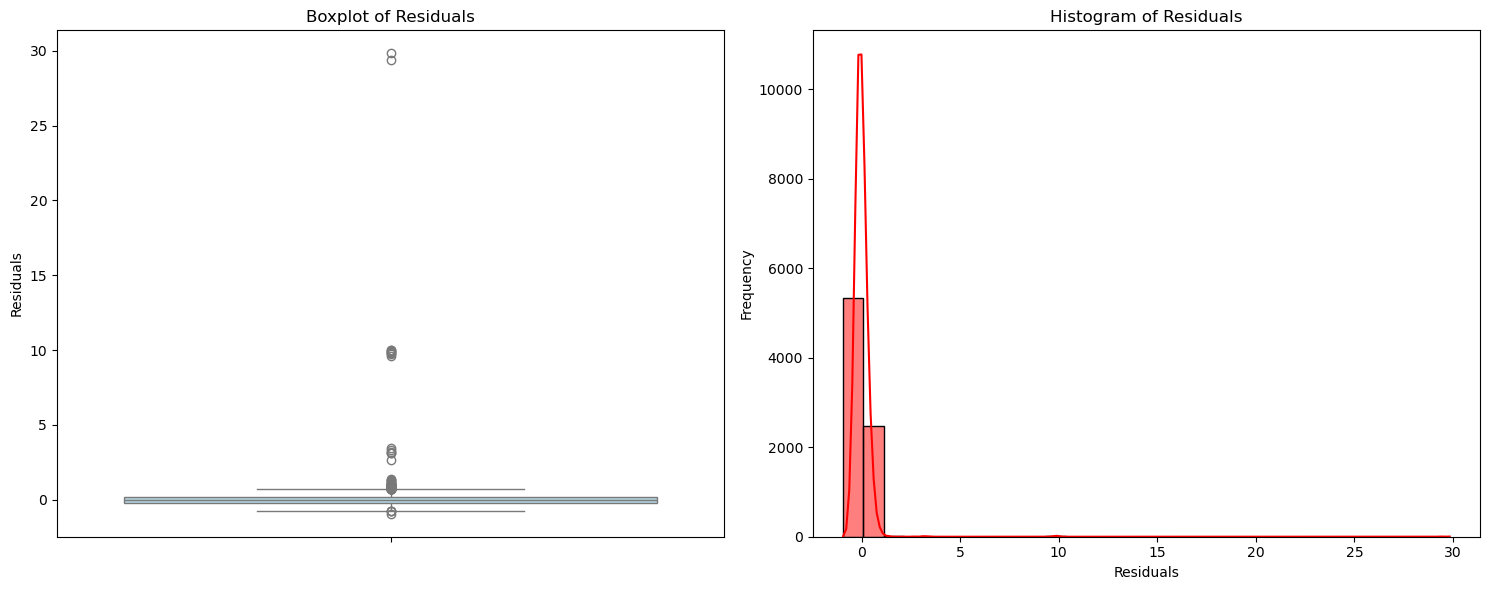

In [211]:
# Calculate residuals
residuals = y - model.predict(X)
    
# Plot Histogram and Box Plot of Residuals side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
# Boxplot of Residuals
sns.boxplot(y=residuals, ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Residuals')
axes[0].set_ylabel('Residuals')
    
# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1], color='red', bins=30)
axes[1].set_title('Histogram of Residuals')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [205]:
# Calculate and print the modal class from the histogram
counts, bin_edges = np.histogram(residuals, bins=30)
modal_class_index = np.argmax(counts)
modal_class = (bin_edges[modal_class_index], bin_edges[modal_class_index + 1])
print(f"Modal class of residuals: {modal_class}")

Modal class of residuals: (-0.935313762345851, 0.09035209783512999)


In [ ]:
#Does histogram look symmetric? Put smooth curve over the histogram. 
# The histogram of residuals does not appear to be symmetric.

In [ ]:
# Do you find any outlier from your boxplot?  YES

In [219]:
# Perform Shapiro-Wilk test for normality of residuals
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test_stat:.4f}, p-value: {shapiro_p_value:.4f}")

Shapiro-Wilk test statistic: 0.2853, p-value: 0.0000


C:\Users\adebo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7836.
  res = hypotest_fun_out(*samples, **kwds)


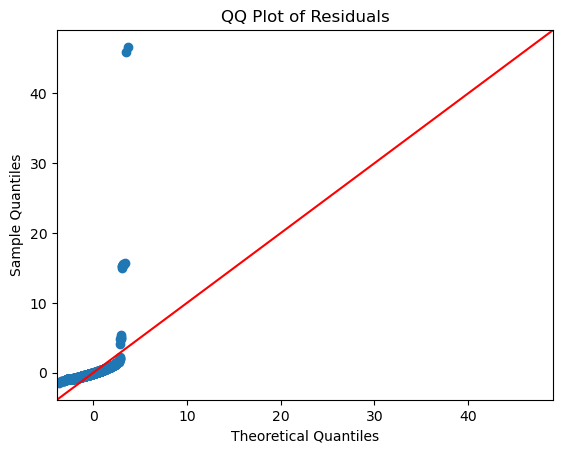

In [221]:
# Show a qq plot of the residuals and give an explanation. 

# Plot QQ plot of Residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

In [ ]:
'''
The QQ plot compares the quantiles of the residuals from the regression model to the quantiles of a normal distribution. In a QQ plot, if the residuals are normally distributed, the points should lie along the 45-degree line.

In the plot,
Most of the points deviate significantly from the 45-degree line. This suggests that the residuals are not normally distributed.
Few points are far from the main cluster of points, indicating potential outliers in the data.
This confirms the result from the Shapiro-Wilk test, which had a p-value of 0.0000, indicating that the residuals are not normally distributed.
'''